## This is an exemple of use of the features present in the keys204ADriver.
This is a driver enabling easy control of a Keysight S series 204A from a python script, trough the rj45 porte of the device. 

In [15]:
import pyvisa as visa
import numpy as np
import matplotlib.pyplot as plt
import lab.keys204ADriver as scope_driver
scope_driver?

Type:        module
String form: <module 'lab.keys204ADriver' from 'C:\\Users\\FPGA designer\\Documents\\GitHub\\controle_manip\\lab\\keys204ADriver.py'>
File:        c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Docstring:   Driver for the Keysight S series 204A, developped at C2N, palaiseau.


In [2]:
visa.ResourceManager().list_resources()

('TCPIP0::WINDOWS-OJ1GKBU.local::hislip0::INSTR',
 'TCPIP0::WINDOWS-OJ1GKBU.local::inst0::INSTR',
 'ASRL1::INSTR',
 'ASRL3::INSTR')

## Scope initialisation

In [14]:
scope_driver.Keys204A?
A = scope_driver.Keys204A("TCPIP0::WINDOWS-OJ1GKBU.local::inst0::INSTR")

Connected Device : KEYSIGHT TECHNOLOGIES,MSOS204A,MY55510136,05.70.00714



Init signature: scope_driver.Keys204A(adress, backend='@ivi')
Docstring:     
object that represents the scope

...

Attributes
----------
adress : str
    the port adress of the scope
ressource_manager : comtypes.POINTER(IResourceManager)
    the ressource manager for the scope
inst : comtypes.POINTER(IFormattedIO488)
    comtypes instance

Methods
----------
do_command(command) :
    sends a command to the scope
do_query_string(query) :
    queries the scope and return the answer as a string
do_query_ieee_block(query) :
    enables querying easily the scope for binary data
do_query_number(query) :
    queries the scope for a number
set_trigger(trigger_channel,trigger_sweep,trigger_level) :
    set the trigger parameters
time_base(time_scale, time_ref) :
    set the time scale on the scope display
set_channels(channels, displays, y_scales, offsets, probes, input_couplings) :
    set the channels display and probes
retrieve_waveform(channel) :
    retrieve a displayed waveform on the s

## Trigger setting

In [4]:
A.set_trigger?
A.set_trigger(1,"TRIGGERED",1)

Signature:
A.set_trigger(
    trigger_channel=1,
    trigger_sweep=None,
    trigger_level=None,
    print_output=0,
)
Docstring:
set the scope's trigger mode, level and channel 

Parameters
----------
trigger_sweep : str
    The type of trigger. "TRIGGERED" or "AUTO". By default no changes are applied.
trigger_level : float
    the level for the trigger. By default no changes are applied.
trigger_channel : int
    the channel on wich the trigger is set.
print_output : boolean
    wether to prit or not the new setting to verify all is good
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      method


## Time base setting

In [5]:
A.time_base?
A.time_base(1e-5,10)

Signature: A.time_base(time_scale, time_ref, print_output=0)
Docstring:
 set the scope's time base scale and offset
 
Parameters
 ----------
 time_scale : float
     time per division in seconds. ranges from 5e-12 to 20.
 time_ref : int
     percentage of the screen (starting from the left) where the time offset is put. 0 = flush left, 50 = middle , 100 = flush right.
 print_output : boolean
     wether to prit or not the new setting to verify all is good
 
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      method


## Channel view setting

### remark : if a probe is set in and is already giving the scaling to the scope, entering a probe ratio will cause an error to occur

In [6]:
A.set_channels?
A.set_channels()

0
1
2
3


Signature:
A.set_channels(
    channels=[1, 2, 3, 4],
    displays=[1, 1, 1, 1],
    y_scales=[1, 1, 1, 1],
    offsets=[0, 0, 0, 0],
    probes=[None, None, None, None],
    input_couplings=['DC', 'DC', 'DC', 'DC'],
    print_output=0,
)
Docstring:
set the scope's time base scale and offset

Parameters
----------
channels : int list
    channels to tweak. 1 to 4.
displays : boolean list
    displaying state of the specified channels.
y_scales : int list
    voltage per division for the specifieds channels.
offsets : real list
    offset for the specified channel
probes : float list
    probes ratio (X:1) for the specified channels : ranges from 1e-4 to 1e3
input_coupling : str list
    choose from the following parameters :
        DC = DC coupling, 1 MΩ impedance.
        DC50 or DCFifty = DC coupling, 50Ω impedance.
        AC = AC coupling, 1 MΩ impedance.
        LFR1 or LFR2 = AC 1 MΩ input impedance.
    When no probe is attached, the coupling for each channel can be AC, DC,
   

## Waveform retrieving and saving

Signature: A.retrieve_waveform(channel)
Docstring:
retrieve y and x of the waveform on the specified channel (THEY MUST BE DISPLAYED)

Parameters
----------
channel : int
    number of channel to retrieve the waveform from

Return
----------
x, y : numpy arrays
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      method


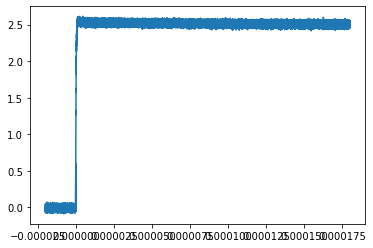

In [16]:
A.retrieve_waveform?
x,y = A.retrieve_waveform(1)
plt.plot(x,y)

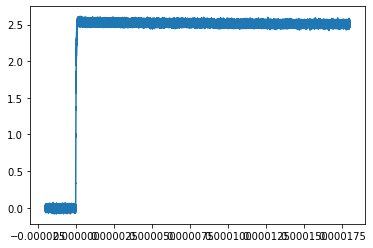

Signature: A.save_waveform(channel, name='waveform', path='')
Docstring:
retrieve y and x of the waveform on the specified channel (THEY MUST BE DISPLAYED) and store thame with the specified name within the specified folder.
The data is stored under numpy array format with x being data[:,0] and y being data[:,1]

Parameters
----------
channel : int
    number of channel to retrieve the waveform from
path : str
    path to where to store the data
name : str
    name under wich data will be stored
File:      c:\users\fpga designer\documents\github\controle_manip\lab\keys204adriver.py
Type:      method


In [17]:
A.save_waveform?
A.save_waveform(1)
data = np.load('waveform.npy')
plt.plot(data[:,0],data[:,1])